**Вариант 13**
**Овчинников Данила ИУ5-82Б**

# Лабораторная работа 2. Методы анализа параметров компонентов моделей функционирования КИС

## Задание 1.

Заданы три независимые целочисленные неотрицательные случайные величины $X_1, X_2, X_3$, необходимо найти математическое ожидание, дисперсию, среднее квадратическое отклонение и коэффициент вариации случайной величины $X_1+X_2+X_3$ численно и теоретически (из определения и с использованием производящей функции).
В таблице ниже по вариантам представлены соответствия значений случайной величины и их вероятности. 

In [21]:
Variant<-13
set.seed(Variant) 
X1<-sample(c(1:20),5)
X2<-sample(c(3:100),5)
X3<-sample(c(0:40),5)
pp1<-runif(5)
p1<-pp1/sum(pp1)
pp2<-runif(5)
p2<-pp2/sum(pp2)
pp3<-runif(5)
p3<-pp3/sum(pp3)

In [22]:
View(data.frame(X1, X2, X3, p1, p2, p3))

X1,X2,X3,p1,p2,p3
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
3,50,16,0.30560821,0.1217534,0.41209694
5,24,14,0.05020882,0.2337225,0.27519884
10,6,22,0.35879729,0.1560960,0.05466657
13,66,4,0.01835962,0.1494926,0.23155858
6,95,11,0.26702606,0.3389355,0.02647908


#### Теоретически из определения и с использованием производящей функции
Производящая функция
$$P_{\zeta}(z)=\sum_{n=0}^\infty p_nz^n$$

$P_{\zeta1}(z) = p_{11} \cdot z^{10} + p_{12} \cdot z^{13} + p_{13} \cdot z^{14} + p_{14} \cdot z^{4} + p_{15} \cdot z^{12}$

$P_{\zeta2}(z) = p_{21} \cdot z^{69} + p_{22} \cdot z^{4} + p_{23} \cdot z^{68} + p_{24} \cdot z^{32} + p_{25} \cdot z^{57}$

$P_{\zeta3}(z) = p_{31} \cdot z^{2} + p_{32} \cdot z^{20} + p_{33} \cdot z^{7} + p_{44} \cdot z^{21} + p_{45} \cdot z^{32}$

$P_{\zeta}(z) = P_{\zeta1+\zeta2+\zeta3}(z) = P_{\zeta1}(z) \cdot P_{\zeta2}(z) \cdot P_{\zeta3}(z)$

<br>

$$M(\zeta)=P'_{\zeta}(z)|_{z=1}$$

$$D(\zeta)=P''_{\zeta}(z)|_{z=1}+P'_{\zeta}(z)|_{z=1}-\left(P'_{\zeta}(z)\right)^2|_{z=1}$$

<br>

$P_{\zeta1}(z)' = 10 \cdot p_{11} \cdot z^{9} + 13 \cdot p_{12} \cdot z^{12} + 14 \cdot p_{13} \cdot z^{13} + 4 \cdot p_{14} \cdot z^{3} + 12 \cdot p_{15} \cdot z^{11}$

$P_{\zeta2}(z)' = 69 \cdot p_{21} \cdot z^{68} + 4 \cdot p_{22} \cdot z^{3} + 68 \cdot p_{23} \cdot z^{67} + 32 \cdot p_{24} \cdot z^{31} + 57 \cdot p_{25} \cdot z^{56}$

$P_{\zeta3}(z)' = 2 \cdot p_{31} \cdot z^{1} + 20 \cdot p_{32} \cdot z^{19} + 7 \cdot p_{33} \cdot z^{6} + 21 \cdot p_{44} \cdot z^{20} + 32 \cdot p_{45} \cdot z^{31}$

$P_{\zeta}(z)' = P_{\zeta1}(z)' \cdot P_{\zeta2}(z) \cdot P_{\zeta3}(z) + P_{\zeta1}(z) \cdot P_{\zeta2}(z)' \cdot P_{\zeta3}(z) + P_{\zeta1}(z) \cdot P_{\zeta2}(z) \cdot P_{\zeta3}(z)'  \quad \quad ((a \cdot b \cdot c)' = a' \cdot b \cdot c + a \cdot b' \cdot c + a \cdot b \cdot c')$

In [23]:
#Производящая функция
e<-expression(
  (p11*z^x11 + p12*z^x12 + p13*z^x13+ p14*z^x14+ p15*z^x15) *
  (p21*z^x21 + p22*z^x22 + p23*z^x23+ p24*z^x24+ p25*z^x25) *
  (p31*z^x31 + p32*z^x32 + p33*z^x33+ p34*z^x34+ p35*z^x35)
)
env<-list(z=1,
  p11=p1[1], p12=p1[2], p13=p1[3], p14=p1[4], p15=p1[5],
  p21=p2[1], p22=p2[2], p23=p2[3], p24=p2[4], p25=p2[5],
  p31=p3[1], p32=p3[2], p33=p3[3], p34=p3[4], p35=p3[5],
  x11=X1[1], x12=X1[2], x13=X1[3], x14=X1[4], x15=X1[5],
  x21=X2[1], x22=X2[2], x23=X2[3], x24=X2[4], x25=X2[5],
  x31=X3[1], x32=X3[2], x33=X3[3], x34=X3[4], x35=X3[5]
)

derrivative_e<-D(e, 'z');
derrivative2_e <- D(derrivative_e, 'z')
M_gen <- eval(derrivative_e, env);
D_gen <- eval(derrivative2_e, env) + M_gen - M_gen^2;
Q_gen <- sqrt(D_gen);
K_gen <- (Q_gen / M_gen) * 100;

In [24]:
# Теоретический способ
# Мат ожидание
M_X1<-sum(p1*X1) 
M_X2<-sum(p2*X2)
M_X3<-sum(p3*X3)
M_X<-M_X1+M_X2+M_X3

# Дисперсия
D_X1<-sum(p1*(X1-M_X1)^2)
D_X2<-sum(p2*(X2-M_X2)^2)
D_X3<-sum(p3*(X3-M_X3)^2)
D_X<-D_X1+D_X2+D_X3

# Ср. квадратичное отклонение
Q=sqrt(D_X)

# Коэфф. вариации случайной величины
K=(Q/M_X)*100

In [25]:
# Экспериментальный способ
getRes<-function(X,P){
  y<-runif(1) # случайные числа от 0 до 1
  sum<-0
  res<-0
  for(i in 1:length(P))
    {
    sum<-sum+P[i]
    if(y<=sum)
      {
      res<-X[i]
      break
      }
    }
  return(res)
}

experimental<-c()
for( i in 1:1000){
  experimental<-c(experimental,getRes(X1,p1)+getRes(X2,p2)+getRes(X3,p3))
}
# Мат ожидание
M_exp<-mean(experimental) 

# Ср. квадратич. отклонение
Q_exp<-sd(experimental)

# Дисперсия
D_exp<-Q_exp^2 

# Коэфф. вариации случайной величины
K_exp<-(Q_exp/M_exp)*100

In [26]:
# сравнительная таблица
table = data.frame(c(M_exp, D_exp, Q_exp, K_exp))
table<-cbind(table, c(M_X, D_X, Q, K))
table<-cbind(table, c(M_gen, D_gen, Q_gen, K_gen))
rownames(table) <- c("ср.", "дис", "ср.кв.", "к.вар.")
colnames(table) <- c("экспериментальное", "теоретическое", "производящая ф-ция")
View(table)

,экспериментальное,теоретическое,производящая ф-ция
,<dbl>,<dbl>,<dbl>
ср.,73.49200,74.16215,74.16215
дис,1169.14708,1199.07377,1199.07377
ср.кв.,34.19279,34.62764,34.62764
к.вар.,46.52587,46.69180,46.69180


Полученные значения практически не отличаются

## Задание 2.

Заданы три независимые целочисленные неотрицательные случайные величины $X_1, X_2, X_3$, распределенные по закону Пуассона, необходимо найти математическое ожидание, дисперсию, среднее квадратическое отклонение и коэффициент вариации случайной величины $X_1+X_2+X_3$ численно и теоретически.
Параметры закона Пуассона для $X_1, X_2, X_3$ определить в соответствии с вариантом.

In [39]:
Variant<-13
set.seed(Variant) 
coefficients=runif(3); coefficients
a1=coefficients[1]
a2=coefficients[2]
a3=coefficients[3]

[1] 0.7103224 0.2461373 0.3896344

Мат. ожидание распределения Пуассона:
$$M[X]=\sum_{n=0}^\infty n\cdot P_{n}=\sum_{n=0}^\infty n\cdot \frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}=e^{-\lambda\cdot \tau}\cdot \lambda \cdot \tau\cdot \sum_{n=1}^\infty\frac{\left(\lambda \cdot \tau\right)^{n-1}}{(n-1)!}=e^{-\lambda\cdot \tau}\cdot \lambda \cdot \tau\cdot e^{\lambda \cdot \tau}=\lambda \cdot \tau$$

$$ M[X_1] = \lambda_1 \cdot \tau; M[X_2] = \lambda_2 \cdot \tau; M[X_3] = \lambda_3 \cdot \tau $$

Мат. ожидание суммы независимых пуассоновских величин:
$$ M_\Sigma = \Sigma_{i=1}^k{M[X_i]} = \Sigma_{i=1}^3{M[X_i]} = M[X_1] + M[X_2] + M[X_3] = (\lambda_1 + \lambda_2 + \lambda_3) \cdot \tau $$


Дисперсия распределения Пуассона:
$$D[X]=\lambda \cdot \tau$$

$$ D[X_1] = \lambda_1 \cdot \tau; D[X_2] = \lambda_2 \cdot \tau; D[X_3] = \lambda_3 \cdot \tau $$

Дисперсия суммы независимых пуассоновских величин:
> Дисперсия алгебраической суммы двух независимых случайных величин равна сумме их дисперсией

$$D[X]_\Sigma = \Sigma_{i=1}^k{D[X_i]} = \Sigma_{i=1}^3{D[X_i]} = D[X_1] + D[X_2] + D[X_3] = (\lambda_1 + \lambda_2 + \lambda_3) \cdot \tau$$



In [40]:
# Теоретический способ
e <- expression((exp(1)^(-1*a1*(1-z)))*(exp(1)^(-1*a2*(1-z)))*(exp(1)^(-1*a3*(1-z))));

tau2_teor <- 1
M2 <- sum(coefficients) * tau2_teor;
D2 <- sum(coefficients) * tau2_teor;
Q2 <- sqrt(D2);
K2 <- Q2 / M2 * 100;

In [41]:
#Через формулы, приведеные в задании 1
derrivative_e<-D(e, 'z');
derrivative2_e <- D(derrivative_e, 'z')
M_gen2 <- eval(derrivative_e, env);
D_gen2 <- eval(derrivative2_e, env) + M_gen - M_gen^2;
Q_gen2 <- sqrt(D_gen);
K_gen2 <- (Q_gen / M_gen) * 100;

In [42]:
# Экспериментальный способ
library(stats)
# Генерирую выборку
N <- 1000;

exp2 <- vapply(
  vector(mode="integer", length = N),
  function(arg) sum(rpois(1, a1), rpois(1, a2), rpois(1, a3)),
  numeric(1)
);

# Выборочные среднее, дисперсия и т.п.
M_exp2 <- mean(exp2, na.rm=TRUE);
D_exp2 <-  sd(exp2, na.rm=TRUE);
Q_exp2  <-  D_exp2^2;
K_exp2 <- D_exp2 / M_exp2 * 100;

In [43]:
# сравнительная таблица
table = data.frame(c(M_exp2, D_exp2, Q_exp2, K_exp2))
table<-cbind(table, c(M2, D2, Q2, K2))
table<-cbind(table, c(M_gen2, D_gen2, Q_gen2, K_gen2))
rownames(table) <- c("ср.", "дис", "ср.кв.", "к.вар.")
colnames(table) <- c("экспериментальное", "теор", "теор. производящая ф-ция")
View(table)

,экспериментальное,теор,теор. производящая ф-ция
,<dbl>,<dbl>,<dbl>
ср.,1.334000,1.346094,1.346094
дис,1.164388,1.346094,1.346094
ср.кв.,1.355800,1.160213,1.160213
к.вар.,87.285470,86.191070,86.191070


## Задание 3.
Обработка сообщения в специализированной ВС осуществляется $K$ последовательными программами. Длительность работы
каждой программы представляет собой случайную величину, распределенную экспоненциально со средним значением $T=\frac{1}{\lambda}$. Найти преобразование Лапласа-Стилтьеса распределения длительности обработки сообщения в ВС, его математическое ожидание и дисперсию.
Также построить модель и провести численный расчет.

In [53]:
Variant<-13
alpha<-runif(7)[7]
alpha

[1] 0.3772562

In [54]:
# K не задан условием задачи
lambda <- 1/alpha
k<-floor(runif(1, 10, 50))
alpha; lambda; k

[1] 0.3772562

[1] 2.650718

[1] 11

#### Преобразование Лапласа-Стилтьеса

$$B(F(t))=\beta(s)=\int_0^\infty e^{-st}dF(t)$$

$f(t) = 1- e^{-\lambda t} \quad \quad df(t) = \lambda e^{-\lambda t} dt $

$\beta(s)=\int_0^\infty e^{-st} \lambda e^{-\lambda t} dt = \frac{\lambda}{\lambda+s}$

<br>

Свойство (8 лекция 2)
> преобразования Лапласа-Стилтьеса: Начальный момент $n$-го порядка $M_n(\zeta)$ неотрицательной случайной величины $\zeta$
$$M(\zeta)=-\beta'(0)$$
$$D(\zeta)=\beta''(0)-\left(\beta'(0)\right)^2$$

$M(\zeta)= - (-\lambda / (s+\lambda)^2)|_{s=0} = M(\zeta)= \frac{1}{\lambda}$

$D(\zeta)=  \lambda (2 s + 2 \lambda) / (s + \lambda)^4 -(-\lambda / (s+\lambda)^2)^2|_{s=0} = 2 / \lambda^2 - 1 / \lambda^2 = 1 / \lambda^2 $

Тут можно еще вопользоваться формулой моментов для экспоненциального распределения:
$$ {M}_{X}(t)=\left(1-{t \over \lambda }\right)^{-1} \quad {M}\left[X^{n}\right]={\frac  {n!}{\lambda ^{n}}}$$


In [55]:
M_3 <- 1/lambda;
D_3 <- 1/lambda^2;
Q_3 <- sqrt(D_3);
K_3 <- (Q_3 / M_3) * 100;

In [56]:
# Генерирую выборку
N <- 1000;
exp3 <- rexp(N, lambda)

# Выборочные среднее, дисперсия и т.п.
M_exp3 <- mean(exp3, na.rm=TRUE);
Q_exp3 <-  sd(exp3, na.rm=TRUE);
D_exp3  <-  Q_exp3^2;
K_exp3 <- Q_exp3 / M_exp3 * 100;

# сравнительная таблица
table = data.frame(c(M_exp3, D_exp3, Q_exp3, K_exp3))
table<-cbind(table, c(M_3, D_3, Q_3, K_3))
rownames(table) <- c("ср.", "дис", "ср.кв.", "к.вар.")
colnames(table) <- c("экспериментальное", "Лапласа-Стилтьеса")
View(table)

,экспериментальное,Лапласа-Стилтьеса
,<dbl>,<dbl>
ср.,0.3545866,0.3772562
дис,0.1367493,0.1423223
ср.кв.,0.3697964,0.3772562
к.вар.,104.2894347,100.0000000


### Модель системы с последовательной обработкой К этапов

Свойство (9 лекция 2)
> Если две независимые случайные величины $\zeta_1, \zeta_2$ имеют функции преобразования Лапласа-Стилтьеса $\beta_1(s),\beta_2(s)$, то случайная величина $\zeta_1+\zeta_2$ имеет преобразование Лапласа-Стилтьеса $\beta_1(s)\cdot\beta_2(s)$

$$\beta_t(s)=\beta_{t1}(s) \beta_{t2}(s)... \beta_{tk}(s) = \prod_{i=1}^{k}\beta_{ti}(s) = \{\beta_{t1}(s) = \beta_{t2}(s) = ... = \beta_{tk}(s)\} = (\beta_t(s))^k$$

$\beta_{ti}(s)= (\frac{\lambda}{\lambda+s})^k$

$M(\zeta)= k / \lambda \quad \quad D(\zeta) = k / \lambda^2 $

In [59]:
M_32 <- k/lambda;
D_32 <- k/lambda^2;
Q_32 <- sqrt(D_32);
K_32 <- (Q_32 / M_32) * 100;

In [60]:
# Генерирую выборку
N <- 5000;
exp32 <- vapply(
  vector(mode="integer", length = N),
  # суммирую времена - значения элементарных событий
  function(arg) sum(rexp(k, lambda)),  
  numeric(1)
);

# Выборочные среднее, дисперсия и т.п.
M_exp32 <- mean(exp32, na.rm=TRUE);
Q_exp32 <-  sd(exp32, na.rm=TRUE);
D_exp32  <-  Q_exp32^2;
K_exp32 <- Q_exp32 / M_exp32 * 100;

# сравнительная таблица
table = data.frame(c(M_exp32, D_exp32, Q_exp32, K_exp32))
table<-cbind(table, c(M_32, D_32, Q_32, K_32))
rownames(table) <- c("ср.", "дис", "ср.кв.", "к.вар.")
colnames(table) <- c("экспериментальное", "Лапласа-Стилтьеса")
View(table)

,экспериментальное,Лапласа-Стилтьеса
,<dbl>,<dbl>
ср.,4.127572,4.149819
дис,1.570377,1.565545
ср.кв.,1.253147,1.251217
к.вар.,30.360381,30.151134


## Задание 4.

Доказать, что сумма величин, распределенных по закону Пуассона с параметрами $\alpha_1, \alpha_2,\ldots$ , распределена по закону Пуассона, также обосновать это экспериментально.

Докажем утверждение для двух величин, очевидно, что оно также будет справедливо для произвольного количества слагаемых.

Итак пусть величины $X_{1}$ и $X_{2}$ имеют распределение Пуассона с параметрами $\lambda_{1}$ и  $\lambda_{2}$ Тогда если $X_{1} = m$, а  $X_{2} = n$, то вероятность того, что их сумма $X_{3} = s = m + n$ равна:

$$P(X_{3}=s) = P(X_{1}=m)\cdot P(X_{2}=n) = \sum_{m + n = s}^{} \frac{\lambda _{1}^{m}e^{-\lambda _{1}}}{m!}\cdot \frac{\lambda _{2}^{n}e^{-\lambda _{2}}}{n!} = e^{-(\lambda _{1} + \lambda _{2})} \sum_{m + n = s}^{} \frac{\lambda _{1}^{m}\lambda _{2}^{n}}{m!n!}=$$
$$= e^{-(\lambda _{1} + \lambda _{2})} \sum_{n = 0}^{s} \frac{\lambda _{1}^{s-n}\lambda _{2}^{n}}{(s-n)!n!} = \frac{e^{-(\lambda _{1} + \lambda _{2})}}{s!} \sum_{n = 0}^{s} \frac{s!}{(s-n)!n!} \lambda _{1}^{s-n}\lambda _{2}^{n} = $$
$$= \frac{e^{-(\lambda _{1} + \lambda _{2})}}{s!} \sum_{n = 0}^{s} \mathbb{C}_{s}^{n} \lambda _{1}^{s-n}\lambda _{2}^{n}$$

Пусть $ \lambda = \lambda _{1} + \lambda _{2}$. $\mathbb{C}$ -кол-во сочетаний. Применяя формулы бинома Ньютона сворачиваем выражение под суммой и получаем:

$$P(X_{3}=s) = \frac{e^{-\lambda}}{s!} (\lambda_{1} + \lambda_{2})^{s} = \frac{e^{-\lambda}\lambda^{s}}{s!}  $$

Т.е. случайная величина$X_{3} = X_{1} + X_{2}$ распределена но закону Пуассона с параметром $ \lambda = \lambda _{1} + \lambda _{2}$

Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.160000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.320000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.480000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.640000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.800000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 0.960000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.120000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.280000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.440000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.600000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.760000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 1.920000"
Warning message in dpois(x, lambda1 + lambda2):
"non-integer x = 2.080000"
Warning message in dpois(

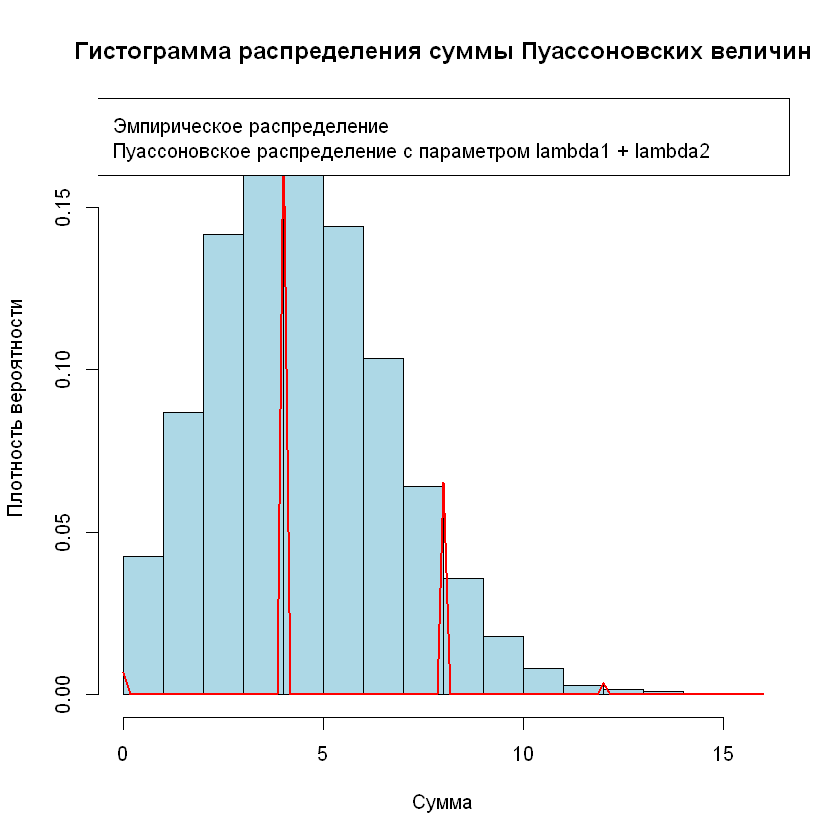

In [73]:
set.seed(42)  # Для воспроизводимости результатов
lambda1 <- 2  # Параметр для первой случайной величины
lambda2 <- 3  # Параметр для второй случайной величины
n <- 10000    # Количество симуляций

# Генерация выборок
X <- rpois(n, lambda1)
Y <- rpois(n, lambda2)

# Суммирование
Z <- X + Y

# Визуализация
hist(Z, breaks = max(Z) - min(Z), probability = TRUE,
     main = "Гистограмма распределения суммы Пуассоновских величин",
     xlab = "Сумма", ylab = "Плотность вероятности",
     col = "lightblue", border = "black")

# Добавление теоретической кривой Пуассона
curve(dpois(x, lambda1 + lambda2), col = "red", add = TRUE, lwd = 2)

legend("topright", legend = c("Эмпирическое распределение", "Пуассоновское распределение с параметром lambda1 + lambda2"),
       col = c("lightblue", "red"), lwd = c(2, 2))

## Задание 5.

Серверная станция состоит из двух модулей питания. Время безотказной работы каждого из них распределено по показательному закону с одинаковыми параметрами:
$$f(t)=\lambda e^{-\lambda t}$$
$t$ - время работы одного модуля до первого отказа.
Второй модуль питания включается сразу же после отказа первого. Определить плотность вероятности времени безотказной работы всей системы, а также математическое ожидание и дисперсию времени безотказной работы.

In [7]:
Variant<-13
set.seed(Variant)
alpha<-runif(100)[77]
lambda<-1/alpha
alpha; lambda

[1] 0.7111212

время безотказной работы модуля 1 и 2:
\begin{align}
t1, t2 
\end{align}

время безотказной работы всей системы:
\begin{align}
t = t_1+t_2 
\end{align}

Таким образом, необходимо определить, каково распределение вероятности для случайной величины t.

\begin{align}
F(t_i<T) = 1 - e^{-λt_i}
\end{align}
** Плотность распределения вероятностей **
(Свойство 9)

\begin{align}
  \int_{A(t)}^{B(t)} f(t1)*f(t-t1) dt1
\end{align}

\begin{align}
  f(t1) = λe^{-λt1}
\end{align}

\begin{align}
  f(t2) = λe^{-λ(t-t1)}
\end{align}

Пределы интегрирования A и B вычисляются по формулам:
\begin{align}
  A(t) = a + \frac{(t-(a+d) + |t-(a+d)|)}{2}
\end{align}

\begin{align}
B(t) =  b + \frac{(t-(b+c) - |t-(b+c)|)}{2}
\end{align}

\begin{align}
  a <= t1 <= b, c <= t2 <= d
\end{align}

\begin{align}
  a = c = 0, b = d = inf
\end{align}
Выполним преобразование Лапласа над плотностью вероятности:
\begin{align}
   B_t(s) = \int_{0}^{inf} e^{-st}dF(t) = \int_{0}^{inf} e^{-st}f(t)dt
\end{align}

\begin{align}
   B_t(s) = \int_{0}^{inf} e^{-st}λ^2 e^{(-λt)}t dt
\end{align}

\begin{align}
   B_t(s) = \frac{λ^2}{(λ+s)^2}
\end{align}

** Математическое ожидание **
\begin{align}
   M = -B'_t(s)|_{s=0}
\end{align}

\begin{align}
   M = - \frac{-2λ^2}{(s+λ)^3} |_{s=0} = - \frac{-2}{λ} = \frac{2}{λ}
\end{align}

** Дисперсия **
\begin{align}
   D = B''_t(s)-(B'_t(s))^2|_{s=0}
\end{align}

\begin{align}
   D = \frac{6}{λ^2} - \left(\frac{-2}{λ}\right)^2 = \frac{2}{λ^2}
\end{align}

In [74]:
mean_5 = 2/lambda; mean_5
disp_5 = 2/(lambda^2); disp_5

[1] 0.7545125

[1] 0.2846445

In [75]:
# Генерирую выборку
N <- 10000;

exp5 <- vapply(
  vector(mode="integer", length = N),
  function(x) sum(rexp(2, lambda)),
  numeric(1)
);

mean5_exp = mean(exp5); mean5_exp
disp5_exp = (sd(exp5))^2; disp5_exp

[1] 0.7536141

[1] 0.2906268